In [2]:
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append('/global/homes/m/mmaus/Python/velocileptors')
sys.path.append('/global/homes/m/mmaus/ShapeFit_Velocileptors/emulator')

from linear_theory import f_of_a, D_of_a

from velocileptors.LPT.lpt_rsd_fftw import LPT_RSD
from make_pkclass import make_pkclass

In [3]:
# Create initial power spectrum
pkclass = make_pkclass(0.59)
h = 0.6766
z=0.59
ki = np.logspace(-3.0,1.0,200)
pi = np.array( [pkclass.pk_cb(k*h, z ) * h**3 for k in ki] )

In [4]:
from shapefit import shapefit_factor

# Set up parameters: (fsigma8, apar, aperp, m)
from compute_pell_tables import kvec, compute_pell_tables

cpars = [0.46, 0.95,0.95, 0.03]

bpars = [1, 0.5, -2, 0,\
         3, -5, 15, 0,\
         1000, -2000, 0]

fsigma8, apar, aperp, m = cpars

(0.0, 0.5)

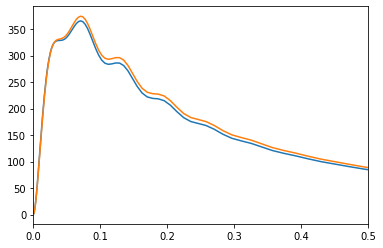

In [5]:
fac = np.exp( shapefit_factor(ki, m = m) )

plt.plot(ki, ki * pi)
plt.plot(ki, ki * fac * pi)
# plt.axvline(x = kp)

plt.xlim(0,0.5)

In [6]:
# Make PT object

sig8_z = pkclass.sigma(8,z,h_units=True)
f = fsigma8 / sig8_z

modPT = LPT_RSD(ki, fac * pi, kIR=0.2,\
                cutoff=10, extrap_min = -4, extrap_max = 3, N = 2000, threads=1, jn=5)
modPT.make_pltable(f, kv=kvec, apar=apar, aperp=aperp, ngauss=3)


0

In [7]:
# test emulator
from emulator_pells import Emulator_Pells

json_file = '/global/homes/m/mmaus/ShapeFit_Velocileptors/emulator/emu/SF_z_0.59_pkells.json'

emu = Emulator_Pells(json_file,order=3)


Loading Taylor series.


(0.0, 3000.0)

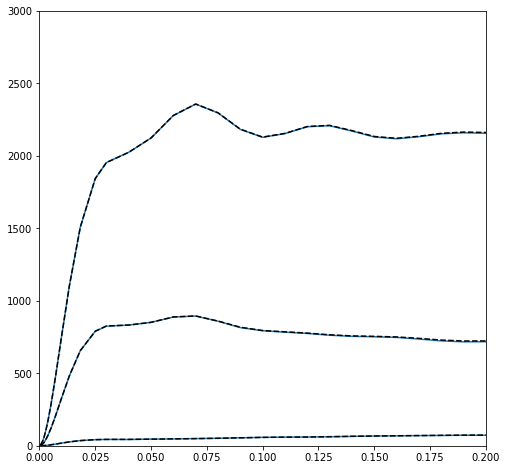

In [9]:
# Compare emulator vs. direct calculation:
kt, p0t, p2t, p4t = modPT.combine_bias_terms_pkell(bpars)
kvec, p0, p2, p4 = emu(cpars, bpars)

plt.figure(figsize=(8,8))
plt.plot(kvec, kvec * p0,'C0-')
plt.plot(kvec, kvec * p2,'C0-')
plt.plot(kvec, kvec * p4,'C0-')

plt.plot(kt, kt * p0t, 'k--')
plt.plot(kt, kt * p2t, 'k--')
plt.plot(kt, kt * p4t, 'k--')

plt.xlim(0,0.2)
plt.ylim(0,3000)